In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("bank_full.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.isnull().sum() #checking if there are any null values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

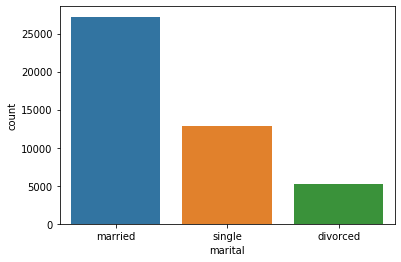

In [5]:
sns.countplot(x='marital', data= df)

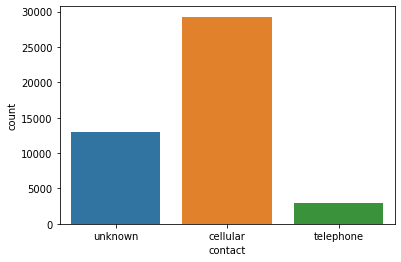

In [6]:
sns.countplot(x='contact', data=df)

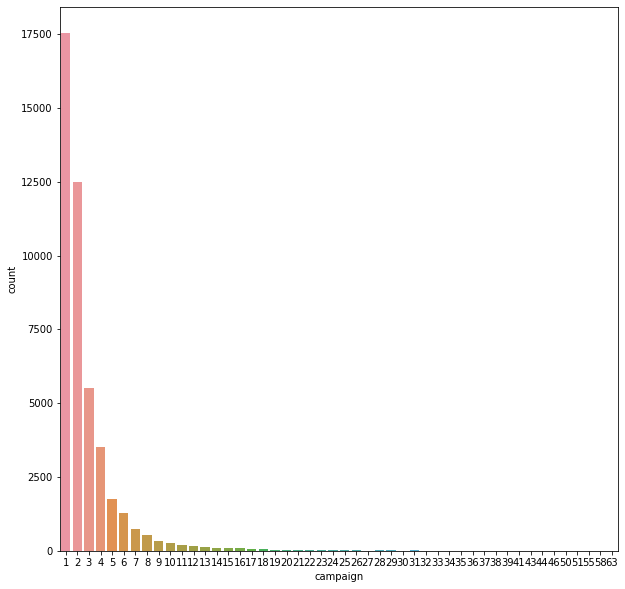

In [7]:
plt.figure(figsize=(10,10))
sns.countplot(x='campaign',data=df)

In [8]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

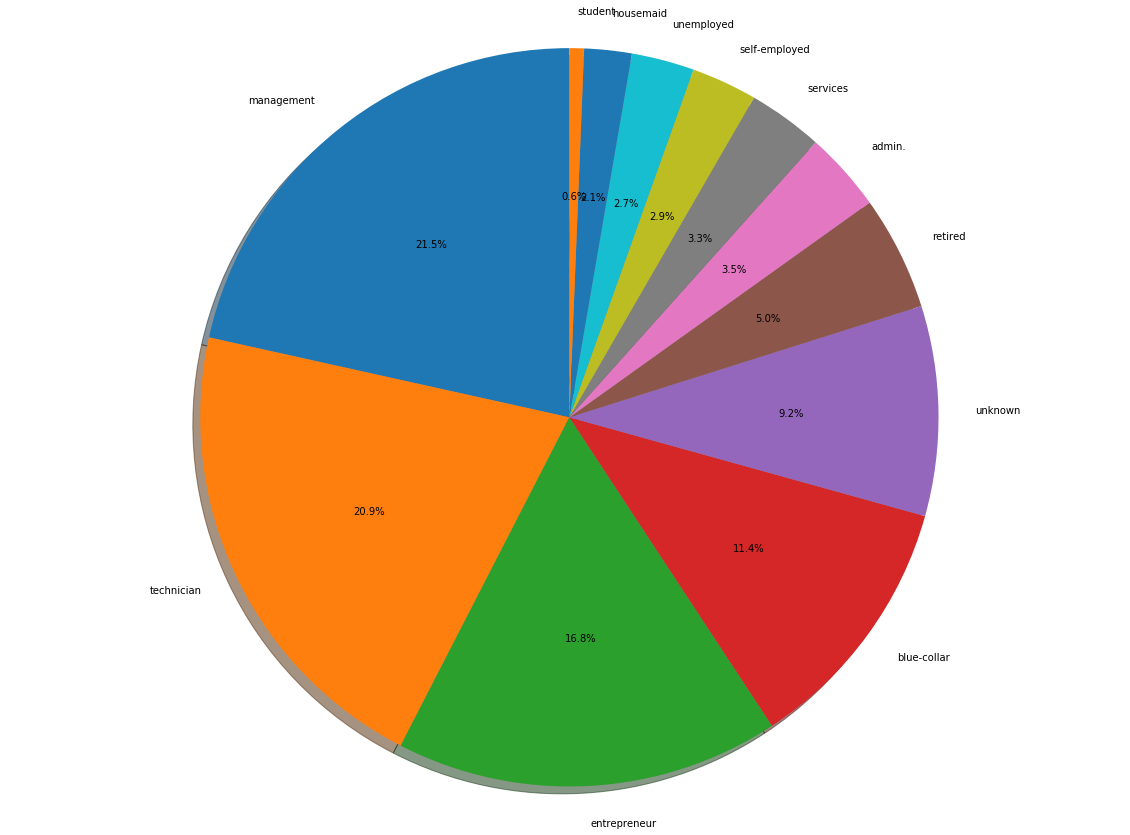

In [9]:
labels = ['management', 'technician','entrepreneur','blue-collar','unknown','retired','admin.','services',
'self-employed','unemployed','housemaid','student']
sizes = df['job'].value_counts()
explode = (0,0,0,0,0,0,0,0,0,0,0,0) #only explode the 2nd slice (i.e Hogs)

fig1 , ax1 = plt.subplots(figsize=(20,15))
ax1.pie(sizes, explode=explode, labels=labels, autopct= '%1.1f%%',
       shadow=True, startangle=90)
ax1.axis('equal') #'equal' is the aspect ratio which ensures that pie chart is drawn in a circular form.

plt.show()


In [10]:
sns.set_style('whitegrid')

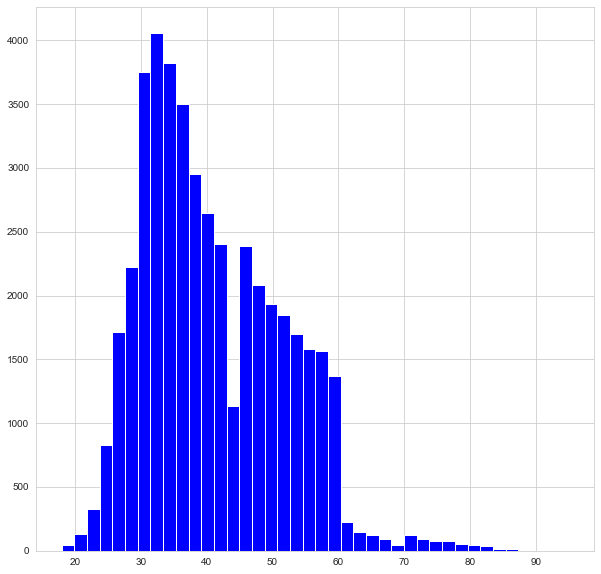

In [11]:
plt.figure(figsize=(10,10))
plt.hist(x='age',data=df,bins=40,color='blue')
plt.show()

In [12]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [13]:
import cufflinks as cf

In [14]:
cf.go_offline()

In [16]:
df['age'].iplot(kind='hist')

In [17]:
plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

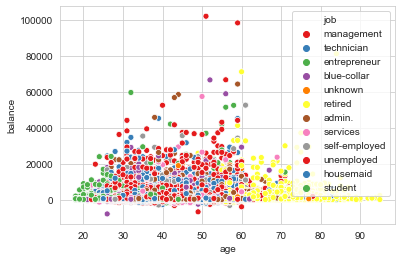

In [18]:
sns.scatterplot(x='age',y='balance', hue='job', data=df, palette='Set1')

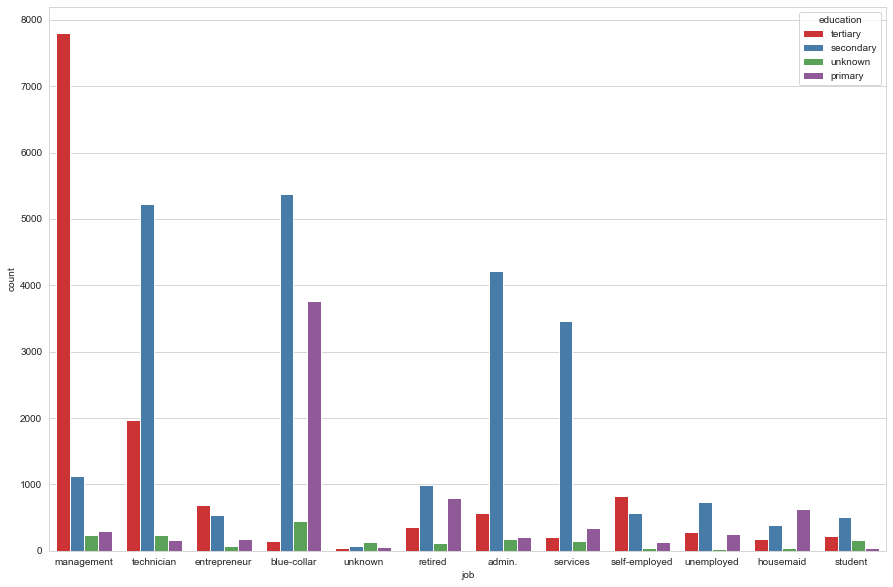

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(x='job',hue='education',data=df,palette='Set1')

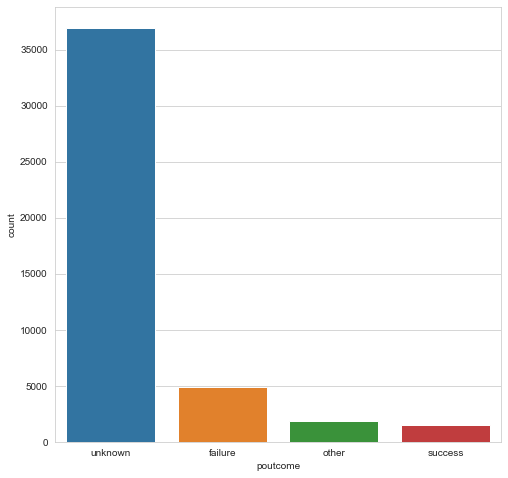

In [20]:
plt.figure(figsize=(8,8))
sns.countplot(x='poutcome',data=df)

In [27]:
df.describe()

,age,balance,day,duration,campaign
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841
std,10.618762,3044.765829,8.322476,257.527812,3.098021
min,18.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [30]:
df.drop(['pdays','previous'],axis=1, inplace=True)

KeyError: "['pdays' 'previous'] not found in axis"

In [31]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,unknown,no


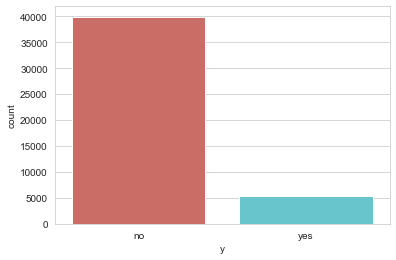

In [32]:
sns.countplot(df['y'], palette='hls')
plt.show()

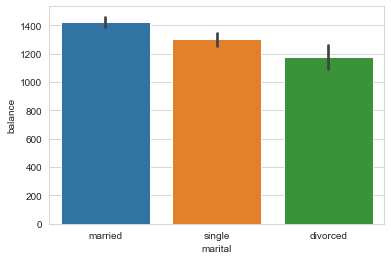

In [33]:
sns.barplot(x='marital', y='balance', data=df)

In [34]:
Count_Term_Submit = len(df[df['y']=='yes'])
Count_Term_NoSubmit = len(df[df['y']=='no'])
percentage_Submit = Count_Term_Submit/(Count_Term_Submit+Count_Term_NoSubmit)
print('\nPercentage of the clients who have subscribed a term deposit :', str(round(percentage_Submit*100,2)),'%')
percentage_NoSubmit = Count_Term_NoSubmit/(Count_Term_Submit+Count_Term_NoSubmit)
print('\nPercentage of the clients who have not subscribed a term deposit :', str(round(percentage_NoSubmit*100,2)),'%')


Percentage of the clients who have subscribed a term deposit : 11.7 %

Percentage of the clients who have not subscribed a term deposit : 88.3 %


In [35]:
df.groupby('y').mean()

,age,balance,day,duration,campaign
y,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350
yes,41.670070,1804.267915,15.158253,537.294574,2.141047


In [36]:
df.groupby('job').mean()

,age,balance,day,duration,campaign
job,,,,,
admin.,39.289886,1135.838909,15.564301,246.896732,2.575324
blue-collar,40.044081,1078.826654,15.442561,262.901562,2.816995
entrepreneur,42.190989,1521.470074,15.702085,256.309348,2.799597
housemaid,46.415323,1392.395161,16.002419,245.825000,2.820968
management,40.449567,1763.616832,16.114189,253.995771,2.864348
retired,61.626767,1984.215106,15.439488,287.361307,2.346731
self-employed,40.484484,1647.970868,16.027866,268.157061,2.853072
services,38.740250,997.088108,15.635532,259.318729,2.718344
student,26.542644,1388.060768,14.897655,246.656716,2.299574


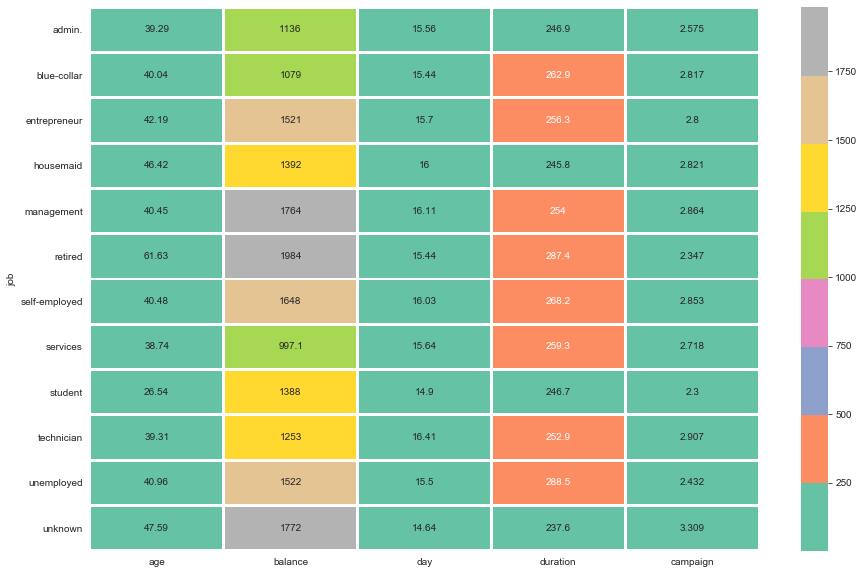

In [37]:
plt.figure(figsize=(15,10))
sns.heatmap(df.groupby('job').mean(),annot=True,fmt='.4g',cmap='Set2',linewidths=2)

In [38]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'poutcome',
       'y'],
      dtype='object')

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
Lbe = LabelEncoder()

In [41]:
# Transforming data to numerical form using label encoder

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = Lbe.fit_transform(df[column])
    else:
        pass

In [42]:
# Splitting data into X and Y variable

X = df[['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign',
       'poutcome']]
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,3


In [43]:
Y = df['y']

In [44]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [45]:
# Splitting data into train and test

from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
LogR = LogisticRegression(solver = 'liblinear', random_state=0)

In [49]:
LogR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
LogR.classes_

array([0, 1])

In [51]:
LogR.intercept_

array([-2.74848719])

In [52]:
LogR.coef_

array([[ 7.48677206e-03,  6.96668594e-03,  2.22087229e-01,
         1.85338250e-01, -5.69196887e-01,  1.99956892e-05,
        -9.96571542e-01, -6.97905198e-01, -6.48893154e-01,
        -8.14309530e-03,  4.50557842e-02,  4.02182079e-03,
        -1.25634979e-01, -1.90904881e-01]])

In [53]:
y_prob = LogR.predict_proba(X_test)[:,1]
y_prob

array([0.01431237, 0.03557687, 0.26905616, ..., 0.09406999, 0.0256427 ,
       0.11092967])

In [54]:
y_pred = LogR.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,classification_report,confusion_matrix

In [56]:
conf_mat = confusion_matrix(y_pred,y_test)
conf_mat

array([[11766,  1246],
       [  247,   305]], dtype=int64)

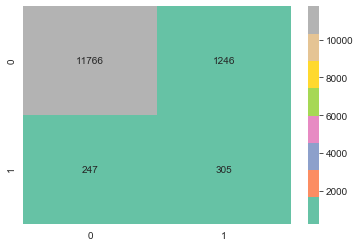

In [57]:
sns.heatmap(conf_mat, annot=True, fmt='.5g', cmap='Set2')

In [58]:
print('Model Accuracy :', str(round(accuracy_score(y_pred,y_test)*100,2)),'%')

Model Accuracy : 88.99 %


In [59]:
from sklearn import metrics

In [60]:
FPR, TPR, Threshold = metrics.roc_curve(y_test, LogR.predict_proba(X_test)[:,1])
FPR, TPR, Threshold 

(array([0.00000000e+00, 8.32431533e-05, 2.49729460e-04, ...,
        9.21418463e-01, 9.21418463e-01, 1.00000000e+00]),
 array([0.        , 0.        , 0.        , ..., 0.99935525, 1.        ,
        1.        ]),
 array([1.99998808e+00, 9.99988082e-01, 9.99968461e-01, ...,
        9.45468624e-03, 9.44602080e-03, 4.56852306e-05]))

In [61]:
ROC_AUC = roc_auc_score(y_pred,y_test)
ROC_AUC

0.7283892349091363

In [62]:
print('Classification report :\n\n', classification_report(y_test, y_pred))

Classification report :

               precision    recall  f1-score   support

           0       0.90      0.98      0.94     12013
           1       0.55      0.20      0.29      1551

    accuracy                           0.89     13564
   macro avg       0.73      0.59      0.62     13564
weighted avg       0.86      0.89      0.87     13564



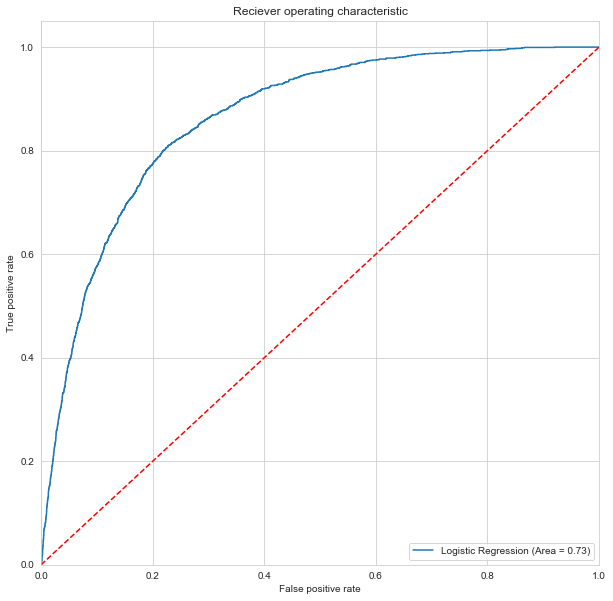

In [63]:
plt.figure(figsize=(10,10))
plt.plot(FPR,TPR, label= 'Logistic Regression (Area = %0.2f)' % ROC_AUC)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever operating characteristic')
plt.legend(loc = 'lower right')
         

In [64]:
# We will now tune the data to see if it improves the result

LogR1 = LogisticRegression(solver='liblinear',C=0.5,random_state=42)

In [65]:
LogR1.fit(X_train,y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
LogR1.predict_proba(X_test)[:,1]

array([0.01438447, 0.03582364, 0.27049482, ..., 0.09392184, 0.02582015,
       0.11002684])

In [67]:
y_pred = LogR1.predict(X_test)

In [68]:
conf_mat = confusion_matrix(y_pred,y_test)
conf_mat

array([[11765,  1247],
       [  248,   304]], dtype=int64)

In [69]:
Accuracy = accuracy_score(y_pred,y_test)
print('Model Accuracy :', str(round(accuracy_score(y_pred,y_test)*100,2)),'%')
print('\nAfter tuning the Accuracy seem to have decreased so we will neglect this model and change the threshold value.')

Model Accuracy : 88.98 %

After tuning the Accuracy seem to have decreased so we will neglect this model and change the threshold value.


In [70]:
threshold = [0.1,0.25,0.8,0.9]

In [73]:
for i in threshold:
    Logistic_grid = ((LogR.predict_proba(X_test)[:,1])>=i).astype(int)
    print("Valuation for test data only :",[i])
    print(classification_report(y_test,y_pred))
    print('Valuation for test data only (new_threshold):')
    print(classification_report(y_test, Logistic_grid))
    print('------------------------------\n\n')

Valuation for test data only : [0.1]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     12013
           1       0.55      0.20      0.29      1551

    accuracy                           0.89     13564
   macro avg       0.73      0.59      0.61     13564
weighted avg       0.86      0.89      0.87     13564

Valuation for test data only (new_threshold):
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     12013
           1       0.28      0.84      0.42      1551

    accuracy                           0.74     13564
   macro avg       0.63      0.78      0.63     13564
weighted avg       0.89      0.74      0.78     13564

------------------------------


Valuation for test data only : [0.25]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     12013
           1       0.55      0.20      0.29      1551

    accuracy                

In [74]:
FPR, TPR, Threshold = metrics.roc_curve(y_test, LogR1.predict_proba(X_test)[:,1])
FPR, TPR, Threshold

(array([0.00000000e+00, 8.32431533e-05, 2.49729460e-04, ...,
        9.25580621e-01, 9.25580621e-01, 1.00000000e+00]),
 array([0.        , 0.        , 0.        , ..., 0.99935525, 1.        ,
        1.        ]),
 array([1.99998784e+00, 9.99987838e-01, 9.99968276e-01, ...,
        9.25051511e-03, 9.24908395e-03, 4.46044369e-05]))

In [75]:
ROC_AUC = roc_auc_score(y_test,y_pred)
ROC_AUC

0.5876791384875713

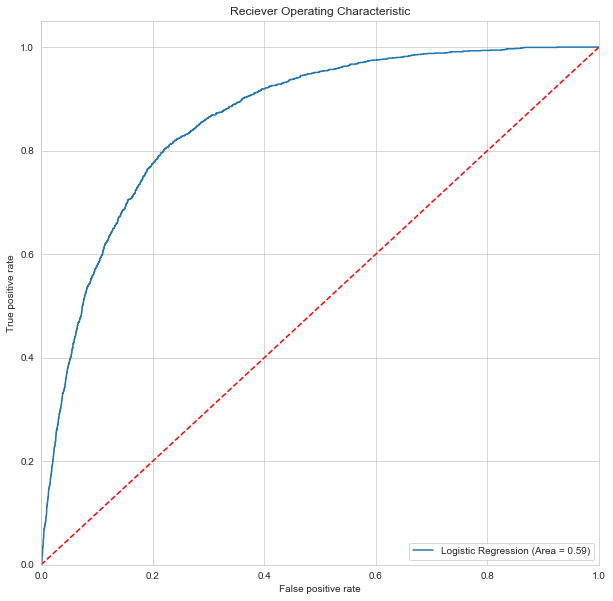

In [76]:
plt.figure(figsize=(10,10))
plt.plot(FPR, TPR, label = 'Logistic Regression (Area = %0.2f)' % ROC_AUC)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Reciever Operating Characteristic")
plt.legend(loc =  'lower right')

In [84]:
print("Before Oversampling, counts of label '1': {}\n".format(sum(y_train == 1)))
print("Before Oversampling, counts of label '0': {}".format(sum(y_train == 0)))

Before Oversampling, counts of label '1': 3738

Before Oversampling, counts of label '0': 27909
